# Data Exploration

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

## IMDB Data

In [2]:
conn = sqlite3.connect("./data/im.db")

In [3]:
imdb_movie_info = pd.read_sql("""SELECT * FROM movie_basics;""", conn)

In [4]:
imdb_movie_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### Top Movies by # Votes

In [5]:
top_movies_by_votes = pd.read_sql("""SELECT genres, primary_title, averagerating, start_year, numvotes
                                FROM movie_basics
                                JOIN movie_ratings
                                    USING(movie_id)
                                ORDER BY numvotes DESC
;""", conn)

In [6]:
top_movies_by_votes

,genres,primary_title,averagerating,start_year,numvotes
0,"Action,Adventure,Sci-Fi",Inception,8.8,2010,1841066
1,"Action,Thriller",The Dark Knight Rises,8.4,2012,1387769
2,"Adventure,Drama,Sci-Fi",Interstellar,8.6,2014,1299334
3,"Drama,Western",Django Unchained,8.4,2012,1211405
4,"Action,Adventure,Sci-Fi",The Avengers,8.1,2012,1183655
...,...,...,...,...,...
73851,Comedy,Columbus,5.8,2018,5
73852,"Comedy,Horror",BADMEN with a good behavior,9.2,2018,5
73853,Romance,July Kaatril,9.0,2019,5
73854,Documentary,Swarm Season,6.2,2019,5


# Top Movies by Average Rating

In [7]:
top_movies_by_rating = pd.read_sql("""SELECT genres, primary_title, averagerating, start_year, numvotes
                                FROM movie_basics
                                JOIN movie_ratings
                                    USING(movie_id)
                                ORDER BY numvotes DESC
;""", conn)

### Top Genres by Count

In [8]:
top_genres_by_count = pd.read_sql("""SELECT genres, COUNT(*) as amount
                                        FROM movie_basics
                                        GROUP BY GENRES
                                        ORDER BY amount DESC
;""", conn)

In [9]:
top_genres_by_count

,genres,amount
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,None,5408
4,Horror,4372
...,...,...
1081,"Action,Animation,Music",1
1082,"Action,Animation,History",1
1083,"Action,Animation,Documentary",1
1084,"Action,Animation,Biography",1


### Top Genres by Rating

In [10]:
top_genres_by_rating = pd.read_sql("""SELECT genres, AVG(averagerating) as average_rating
                                        FROM movie_basics
                                        JOIN movie_ratings
                                            USING(movie_id)
                                        GROUP BY GENRES
                                        ORDER BY average_rating DESC
;""", conn)

In [11]:
top_genres_by_rating

,genres,average_rating
0,"Comedy,Documentary,Fantasy",9.4
1,"Documentary,Family,Musical",9.3
2,"History,Sport",9.2
3,"Music,Mystery",9.0
4,Game-Show,9.0
...,...,...
919,"Crime,Music",2.4
920,"History,Sci-Fi,Thriller",2.3
921,"Adventure,Crime,Romance",2.3
922,"Adult,Horror",2.0


## Box Office Mojo Data

In [12]:
df = pd.read_csv('./data/bom.movie_gross.csv.gz')

In [13]:
foreign_dropped = df[~df['foreign_gross'].isnull()]['foreign_gross']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
bom = df.dropna(how='any',axis=0) 

In [16]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [17]:
bom['foreign_gross'].astype('str')

0       652000000
1       691300000
2       664300000
3       535700000
4       513900000
          ...    
3275      1500000
3286       229000
3309       256000
3342         5200
3353        30000
Name: foreign_gross, Length: 2007, dtype: object

In [18]:
bom['foreign_gross']=bom['foreign_gross'].str.replace(',','')

<ipython-input-18-78d6ba6efc8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom['foreign_gross']=bom['foreign_gross'].str.replace(',','')


In [19]:
bom['foreign_gross'] = bom['foreign_gross'].astype(float)

<ipython-input-19-1ddd575bdf56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom['foreign_gross'] = bom['foreign_gross'].astype(float)


## Merge BOM and Budgets Data

In [20]:
budgets = pd.read_csv('./data/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [22]:
# to change dollar variables into integer types
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x.str.replace('$','')).apply(lambda x: x.str.replace(',','')).astype(np.int64)

In [23]:
bom_budgets1 = pd.merge(budgets, bom, how='left',
                  left_on='movie', right_on='title')
bom_budgets1.head(10)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,2011.0
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,NaN,NaN,NaN,NaN,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015.0
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,NaN,NaN,NaN,NaN,NaN
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,NaN,NaN,NaN,NaN,NaN
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.0,1369.5,2018.0
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,NaN,NaN,NaN,NaN,NaN
8,9,2017-11-17,Justice League,300000000,229024295,655945209,Justice League,WB,229000000.0,428900000.0,2017.0
9,10,2015-11-06,Spectre,300000000,200074175,879620923,Spectre,Sony,200100000.0,680600000.0,2015.0


In [24]:
top_100 = bom_budgets1.nlargest(100, 'domestic_gross_x')

In [25]:
top_100.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,NaN,NaN,NaN,NaN,NaN
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,NaN,NaN,NaN,NaN,NaN
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,Black Panther,BV,700100000.0,646900000.0,2018.0
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.0,1369.5,2018.0
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,NaN,NaN,NaN,NaN,NaN


In [26]:
top_movie_titles = set(top_movies_by_votes.primary_title)

In [27]:
same_movies = []
for movie in top_100.title:
    if movie in top_movie_titles:
        same_movies.append(movie)

In [28]:
len(same_movies)

43

## Filter & Join IMDB Genre Data

In [29]:
filtered_imdb = top_movies_by_votes[top_movies_by_votes.primary_title.isin(same_movies)]

In [30]:
filtered_imdb.head()

,genres,primary_title,averagerating,start_year,numvotes
0,"Action,Adventure,Sci-Fi",Inception,8.8,2010,1841066
1,"Action,Thriller",The Dark Knight Rises,8.4,2012,1387769
7,"Action,Adventure,Comedy",Guardians of the Galaxy,8.1,2014,948394
8,"Action,Adventure,Comedy",Deadpool,8.0,2016,820847
9,"Action,Adventure,Sci-Fi",The Hunger Games,7.2,2012,795227


In [31]:
merged = pd.merge(left=filtered_imdb,right=top_100, how='left',      
left_on='primary_title', right_on='movie')

In [32]:
merged

,genres,primary_title,averagerating,start_year,numvotes,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,"Action,Adventure,Sci-Fi",Inception,8.8,2010,1841066,38,2010-07-16,Inception,160000000,292576195,835524642,Inception,WB,292600000.0,535700000.0,2010.0
1,"Action,Thriller",The Dark Knight Rises,8.4,2012,1387769,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,The Dark Knight Rises,WB,448100000.0,636800000.0,2012.0
2,"Action,Adventure,Comedy",Guardians of the Galaxy,8.1,2014,948394,14,2014-08-01,Guardians of the Galaxy,170000000,333172112,770867516,Guardians of the Galaxy,BV,333200000.0,440200000.0,2014.0
3,"Action,Adventure,Comedy",Deadpool,8.0,2016,820847,56,2016-02-12,Deadpool,58000000,363070709,801025593,Deadpool,Fox,363100000.0,420000000.0,2016.0
4,"Action,Adventure,Sci-Fi",The Hunger Games,7.2,2012,795227,38,2012-03-23,The Hunger Games,80000000,408010692,677923379,The Hunger Games,LGF,408000000.0,286400000.0,2012.0
5,"Adventure,Family,Fantasy",The Hobbit: An Unexpected Journey,7.9,2012,719629,19,2012-12-14,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,The Hobbit: An Unexpected Journey,WB (NL),303000000.0,718100000.0,2012.0
6,"Drama,Sci-Fi,Thriller",Gravity,7.7,2013,710018,16,2013-10-04,Gravity,110000000,274092705,693698673,Gravity,WB,274100000.0,449100000.0,2013.0
7,"Action,Adventure,Sci-Fi",Iron Man 3,7.2,2013,692794,48,2013-05-03,Iron Man 3,200000000,408992272,1215392272,Iron Man 3,BV,409000000.0,805800000.0,2013.0
8,"Adventure,Animation,Comedy",Toy Story 3,8.3,2010,682218,47,2010-06-18,Toy Story 3,200000000,415004880,1068879522,Toy Story 3,BV,415000000.0,652000000.0,2010.0
9,"Action,Adventure,Sci-Fi",Avengers: Infinity War,8.5,2018,670926,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,BV,678800000.0,1369.5,2018.0


In [33]:
genres_grouped = merged.groupby(by=["genres"]).mean()

In [34]:
genres_grouped = genres_grouped.reset_index()
genres_grouped

,genres,averagerating,start_year,numvotes,id,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,foreign_gross,year
0,"Action,Adventure,Animation",7.700000,2018.000000,2.035100e+05,44.000000,2.000000e+08,6.085817e+08,1.242521e+09,608600000.0,634200000.0,2018.000000
1,"Action,Adventure,Comedy",7.760000,2016.400000,5.773412e+05,41.000000,1.216000e+08,3.480804e+08,8.340100e+08,346880000.0,483440000.0,2016.400000
2,"Action,Adventure,Fantasy",6.775000,2016.750000,4.652008e+05,52.250000,1.837500e+08,3.507714e+08,8.953970e+08,350800000.0,546750000.0,2016.750000
3,"Action,Adventure,Sci-Fi",7.270588,2014.352941,6.062879e+05,37.176471,1.932706e+08,4.289006e+08,1.073270e+09,428900000.0,506953081.7,2014.352941
4,"Action,Adventure,Thriller",7.800000,2012.000000,5.922210e+05,52.000000,2.000000e+08,3.043603e+08,1.110527e+09,304400000.0,804200000.0,2012.000000
5,"Action,Biography,Drama",7.300000,2014.000000,4.019150e+05,57.000000,5.800000e+07,3.501264e+08,5.473264e+08,350100000.0,197300000.0,2014.000000
6,"Action,Crime,Thriller",7.200000,2015.000000,3.350740e+05,67.000000,1.900000e+08,3.530070e+08,1.518723e+09,353000000.0,1163.0,2015.000000
7,"Action,Thriller",8.400000,2012.000000,1.387769e+06,11.000000,2.750000e+08,4.481391e+08,1.084439e+09,448100000.0,636800000.0,2012.000000
8,"Adventure,Animation,Comedy",7.450000,2014.250000,3.790661e+05,53.125000,1.375000e+08,3.840330e+08,1.032317e+09,384037500.0,648350000.0,2014.250000
9,"Adventure,Drama,Fantasy",5.000000,2010.000000,2.117330e+05,53.000000,6.800000e+07,3.005318e+08,7.061028e+08,300500000.0,398000000.0,2010.000000


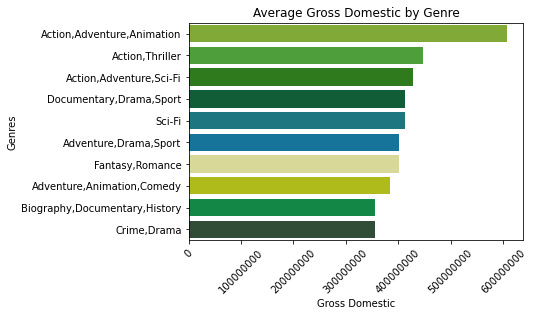

In [35]:
colors = [(134/255, 188/255, 37/255), (67/255, 176/255, 42/255), (38/255, 137/255, 13/255), (4/255, 106/255, 56/255), (13/255, 131/255, 144/255), (0/255, 124/255, 176/255), (227/255, 228/255, 141/255), (196/255, 214/255, 0), (0, 154/255, 68/255), (44/255, 82/255, 52/255), (160/255, 220/255, 255/255)]

sns.barplot(
    x='domestic_gross_x',
    y='genres',
    data=genres_grouped.nlargest(10, 'domestic_gross_x'),
    palette=colors
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.ylabel('Genres')
plt.xlabel('Gross Domestic')
plt.title('Average Gross Domestic by Genre')
plt.savefig('average-gross.png')
plt.show()

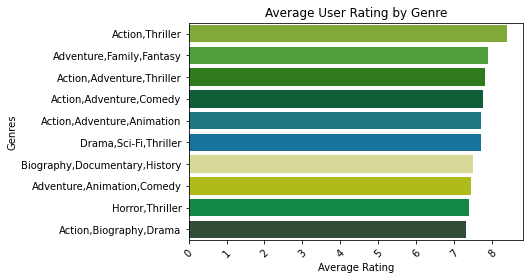

In [36]:
sns.barplot(
    x='averagerating',
    y='genres',
    data=genres_grouped.nlargest(10, 'averagerating'),
    palette=colors
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.ylabel('Genres')
plt.xlabel('Average Rating')
plt.title('Average User Rating by Genre')
plt.savefig('average-ratings.png')
plt.show()

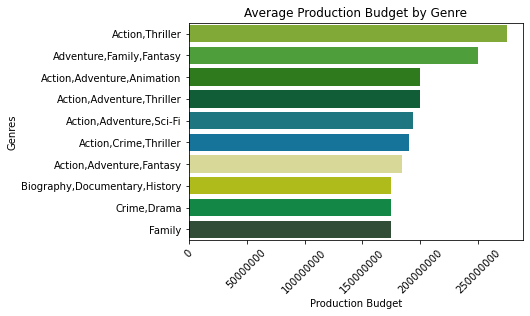

In [37]:
sns.barplot(
    x='production_budget',
    y='genres',
    data=genres_grouped.nlargest(10, 'production_budget'),
    palette=colors
)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.ylabel('Genres')
plt.xlabel('Production Budget')
plt.title('Average Production Budget by Genre')
plt.show()

In [38]:
originals = [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
top_movies = filtered_imdb.reset_index()
top_movies['original'] = originals
top_movies.head()

,index,genres,primary_title,averagerating,start_year,numvotes,original
0,0,"Action,Adventure,Sci-Fi",Inception,8.8,2010,1841066,1
1,1,"Action,Thriller",The Dark Knight Rises,8.4,2012,1387769,0
2,7,"Action,Adventure,Comedy",Guardians of the Galaxy,8.1,2014,948394,0
3,8,"Action,Adventure,Comedy",Deadpool,8.0,2016,820847,0
4,9,"Action,Adventure,Sci-Fi",The Hunger Games,7.2,2012,795227,0


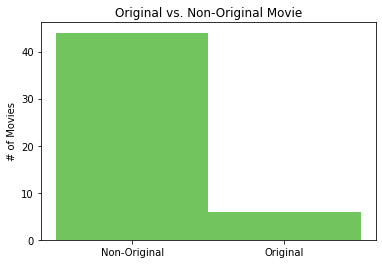

In [39]:
hist = sns.histplot(top_movies['original'], bins=2, discrete=True, color='#43B02A', edgecolor=None)
plt.title('Original vs. Non-Original Movie')
plt.xticks([0,1], ['Non-Original', 'Original'])
plt.xlabel('')
plt.ylabel('# of Movies')
plt.savefig('original-non.png')
plt.show()

In [40]:
#conn.close()